In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import os

# Set environment variable to limit number of threads to 1
os.environ['OMP_NUM_THREADS'] = '1'

In [3]:
# Load the data
file_path = '2025-VeloCityX-Expanded-Fan-Engagement-Data.csv'  
df = pd.read_csv(file_path)

In [4]:
# Show the first few rows of the data
df.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [5]:
# Check for missing values
df.isnull().sum()

User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64

In [6]:
# Drop rows/columns with too many missing values or fill missing values if necessary
df.dropna(inplace=True)  

In [7]:
# Basic statistical summary
print(df.describe())

       Fan Challenges Completed  Predictive Accuracy (%)  \
count                100.000000               100.000000   
mean                   5.790000                74.990000   
std                    2.825908                14.033506   
min                    1.000000                50.000000   
25%                    3.000000                62.000000   
50%                    6.000000                77.000000   
75%                    8.000000                86.500000   
max                   10.000000                98.000000   

       Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
count                     100.000000                            100.000000   
mean                        2.670000                              8.680000   
std                         2.064882                              6.340315   
min                         0.000000                              0.000000   
25%                         1.000000                              2.0

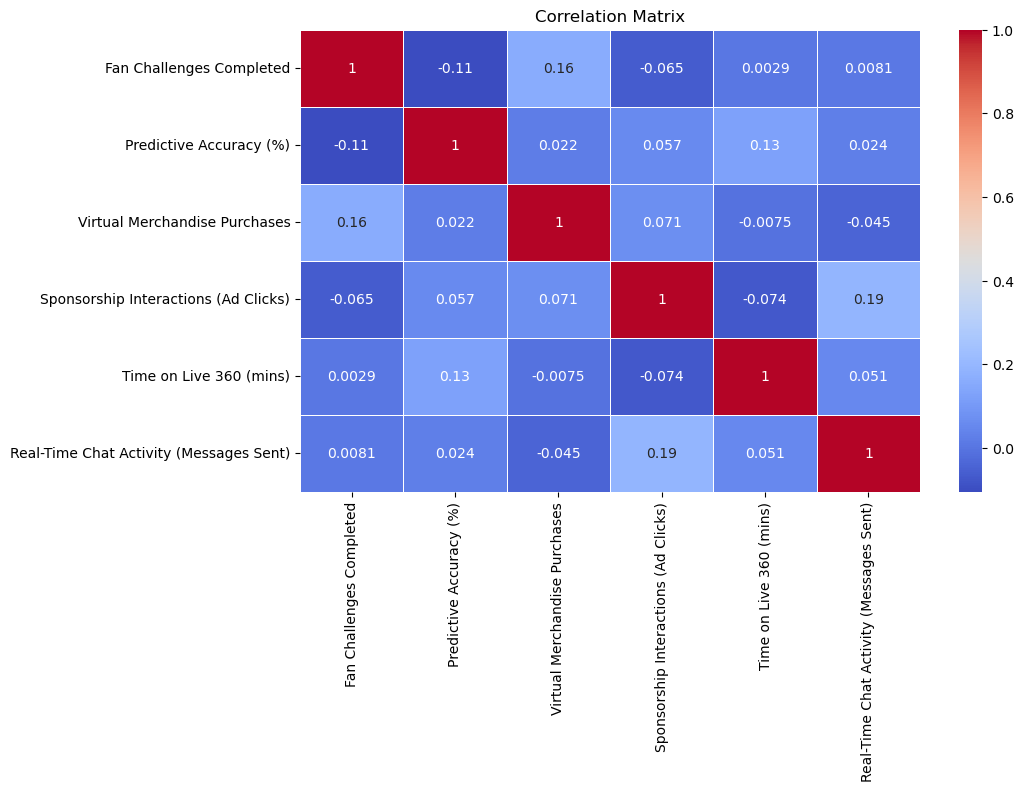

In [8]:
# Clustering analysis
features = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases', 
            'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 
            'Real-Time Chat Activity (Messages Sent)']

# Only keep numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])


# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


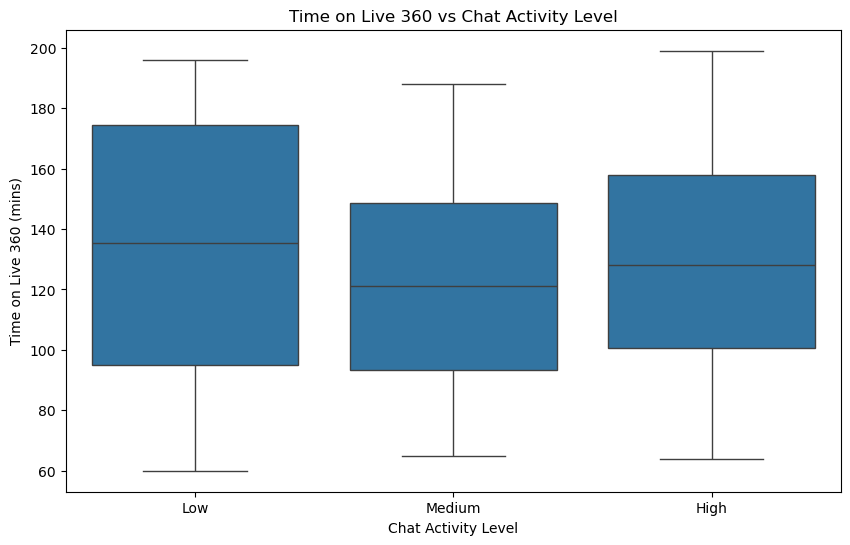

In [9]:
# Box plot of Time on Live 360 for different levels of Real-Time Chat Activity
df['Chat Activity Level'] = pd.cut(df['Real-Time Chat Activity (Messages Sent)'], 
                                   bins=[0, 10, 25, 50], 
                                   labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Chat Activity Level', y='Time on Live 360 (mins)', data=df)
plt.title('Time on Live 360 vs Chat Activity Level')
plt.show()

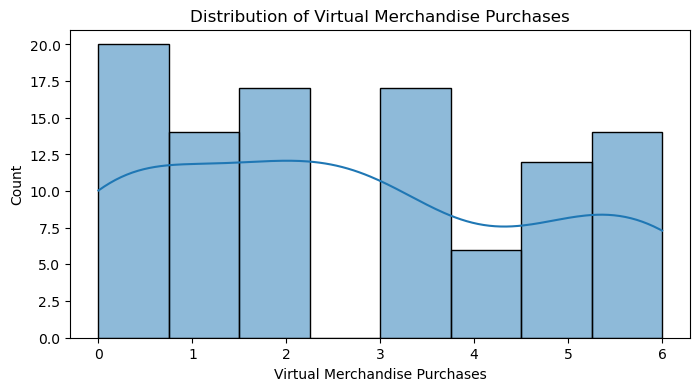

In [10]:
# Distribution of virtual merchandise purchases
plt.figure(figsize=(8, 4))
sns.histplot(df['Virtual Merchandise Purchases'], kde=True)
plt.title('Distribution of Virtual Merchandise Purchases')
plt.show()

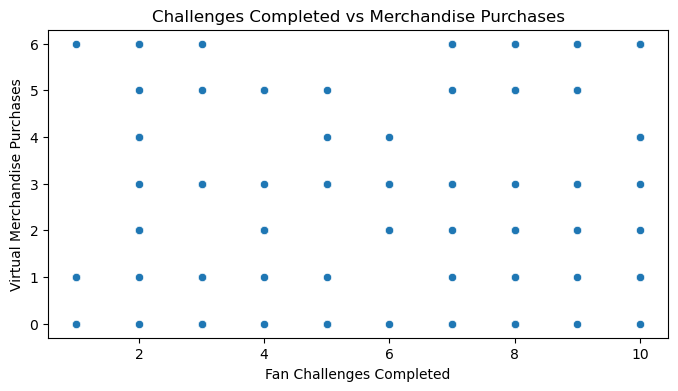

In [11]:
# Relationship between challenges completed and merchandise purchases
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Fan Challenges Completed', y='Virtual Merchandise Purchases', data=df)
plt.title('Challenges Completed vs Merchandise Purchases')
plt.show()

In [12]:
# Create a feature like "Engagement Score" based on user activity
df['Engagement Score'] = (df['Fan Challenges Completed'] * 0.4) + \
                         (df['Predictive Accuracy (%)'] * 0.3) + \
                         (df['Sponsorship Interactions (Ad Clicks)'] * 0.2) + \
                         (df['Time on Live 360 (mins)'] * 0.1)

In [13]:
# Standardize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Fan Challenges Completed', 'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Engagement Score']])

C:\Users\calviet\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\calviet\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\calviet\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\calviet\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:14

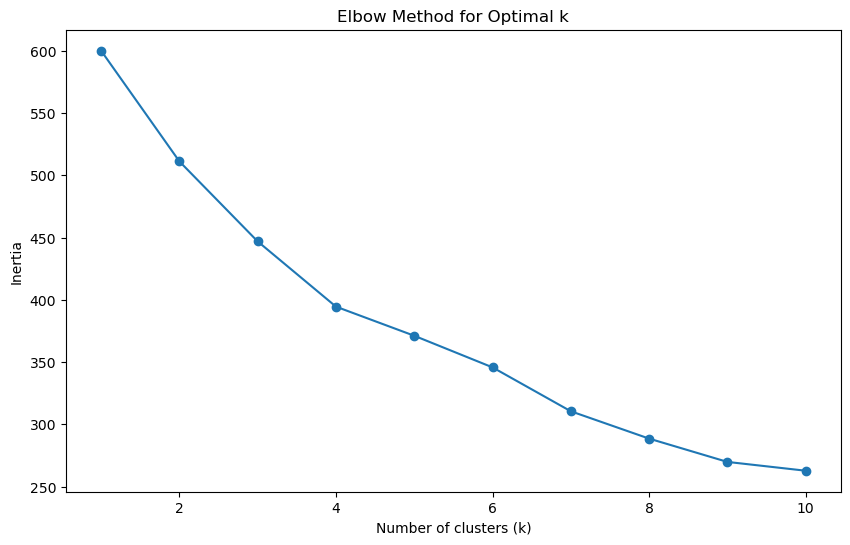

In [14]:
# Clustering analysis
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [15]:
# Apply KMeans clustering -- based on elbow graphs we pick 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42) 
df['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\calviet\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


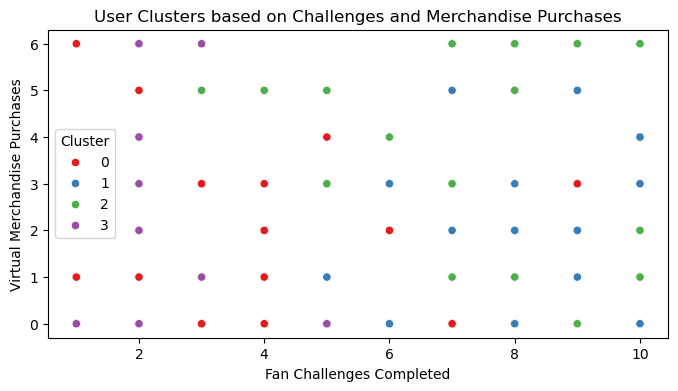

In [16]:
# Visualize clusters 
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Fan Challenges Completed', y='Virtual Merchandise Purchases', hue='Cluster', data=df, palette='Set1')
plt.title('User Clusters based on Challenges and Merchandise Purchases')
plt.show()

In [17]:
# Analysis of clusters
cluster_means = df.groupby('Cluster')[features].mean()
print("Cluster Means:")
print(cluster_means)

Cluster Means:
         Fan Challenges Completed  Predictive Accuracy (%)  \
Cluster                                                      
0                        4.035714                71.642857   
1                        8.166667                80.500000   
2                        7.629630                69.925926   
3                        3.047619                79.666667   

         Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
Cluster                                                                        
0                             1.821429                             11.142857   
1                             2.666667                             11.166667   
2                             3.888889                              4.925926   
3                             2.238095                              7.380952   

         Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  
Cluster                                                

In [18]:
cluster_counts = df['Cluster'].value_counts()
cluster_counts

Cluster
0    28
2    27
1    24
3    21
Name: count, dtype: int64

# Cluster Analysis Insights

## Cluster 0

Fan Challenges Completed: 4.04 (Lowest fan challenge participation rate)
Predictive Accuracy: 71.64% (Moderate prediction accuracy)
Virtual Merchandise Purchases: 1.82 (Moderate but not highly engaged with merchandise)
Sponsorship Interactions: 11.14 (High ad click-through rate)
Time on Live 360: 93.54 mins (Lowest time spent on the live coverage)
Real-Time Chat Activity: 26.57 messages (High chat activity)

Key Insight: Cluster 0 users seem to be moderately engaged across all features. They complete fewer challenges but have a fairly high rate of ad interactions. This group could be motivated by content that enhances sponsorship interaction, as they respond well to ads.

## Cluster 1

Fan Challenges Completed: 8.17 (Highest challenge participation)
Predictive Accuracy: 80.5% (Highest predictive accuracy among all clusters)
Virtual Merchandise Purchases: 2.67 (Moderate merchandise engagement)
Sponsorship Interactions: 11.17 (Highest ad click-through rate)
Time on Live 360: 160.75 mins (Very high time spent on live coverage)
Real-Time Chat Activity: 26.88 messages (High chat activity)

Key Insight: Cluster 1 represents the most engaged fans. They are highly active in fan challenges, highly accurate in predictions, and spend significant time on live coverage. These fans are likely to respond well to interactive and immersive experiences. This group is a prime target for premium engagement features and high-value sponsorships.

## Cluster 2

Fan Challenges Completed: 7.63 (High challenge participation)
Predictive Accuracy: 69.93% (Lowest prediction accuracy)
Virtual Merchandise Purchases: 3.89 (Highest virtual merchandise purchases)
Sponsorship Interactions: 4.93 (Lowest ad click-through rate)
Time on Live 360: 110.30 mins (Moderate time on live coverage)
Real-Time Chat Activity: 22.67 messages (Moderate chat activity)

Key Insight: Cluster 2 fans are highly motivated by virtual merchandise but have lower predictive accuracy and a low response to sponsorships. This group is ideal for pushing exclusive virtual goods and special in-app purchases rather than focusing on sponsorship-driven content.

## Cluster 3

Fan Challenges Completed: 3.05 (Lowest challenge participation)
Predictive Accuracy: 79.67% (High predictive accuracy)
Virtual Merchandise Purchases: 2.24 (Moderate merchandise purchases)
Sponsorship Interactions: 7.38 (Moderate sponsorship interaction)
Time on Live 360: 165.71 mins (Highest time spent on live coverage)
Real-Time Chat Activity: 24.00 messages (Moderate chat activity)

Key Insight: Cluster 3 users engage the most with the live coverage and demonstrate high predictive accuracy but participate in fewer challenges and show moderate engagement with sponsorships. This group may prefer high-quality content, strategic prediction games, and offers related to live coverage.

In [24]:
# Set the style for the plots
sns.set(style="whitegrid")

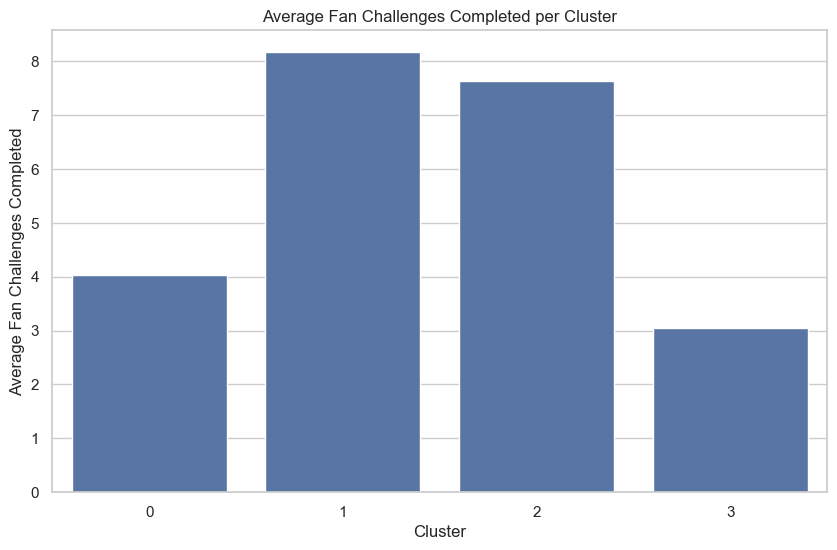

In [25]:
# Plot 1: Average Fan Challenges Completed per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y='Fan Challenges Completed', data=cluster_means)
plt.title('Average Fan Challenges Completed per Cluster')
plt.ylabel('Average Fan Challenges Completed')
plt.xlabel('Cluster')
plt.show()

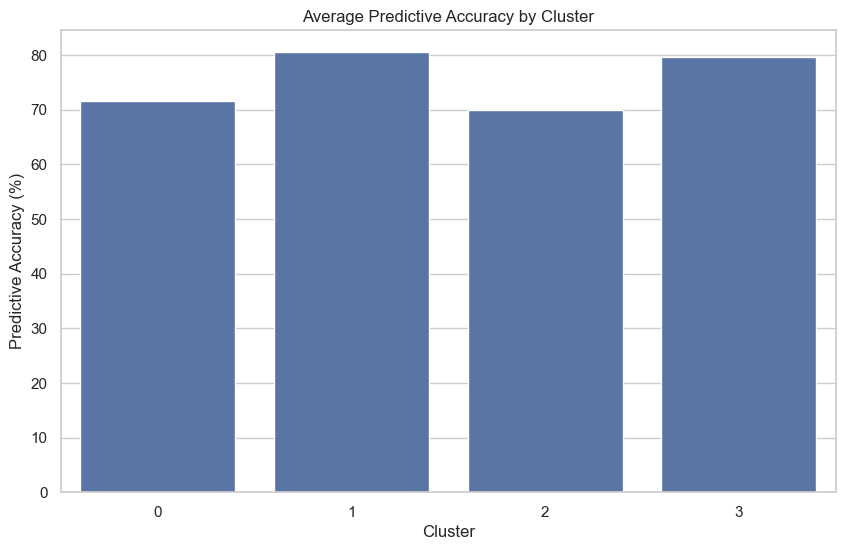

In [26]:
# 2. Predictive Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y='Predictive Accuracy (%)', data=cluster_means)
plt.title('Average Predictive Accuracy by Cluster')
plt.ylabel('Predictive Accuracy (%)')
plt.xlabel('Cluster')
plt.show()  

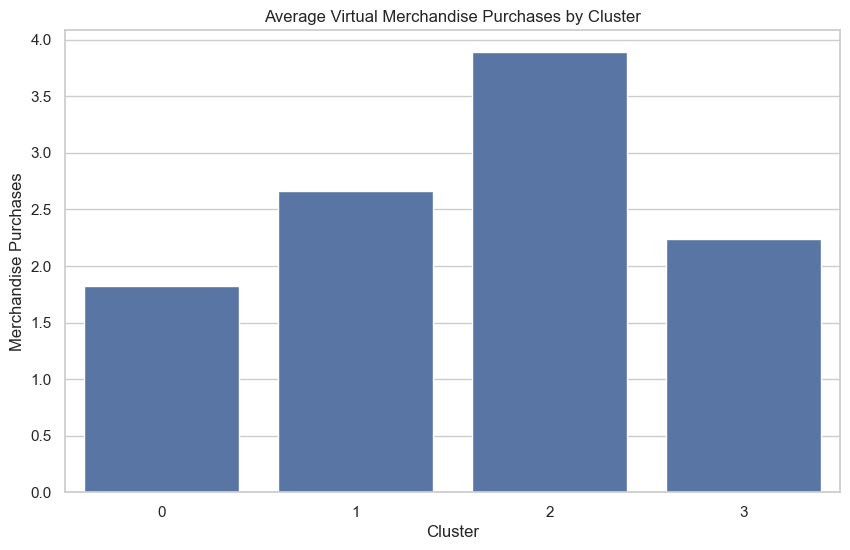

In [27]:
# 3. Virtual Merchandise Purchases
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y='Virtual Merchandise Purchases', data=cluster_means)
plt.title('Average Virtual Merchandise Purchases by Cluster')
plt.ylabel('Merchandise Purchases')
plt.xlabel('Cluster')
plt.show() 

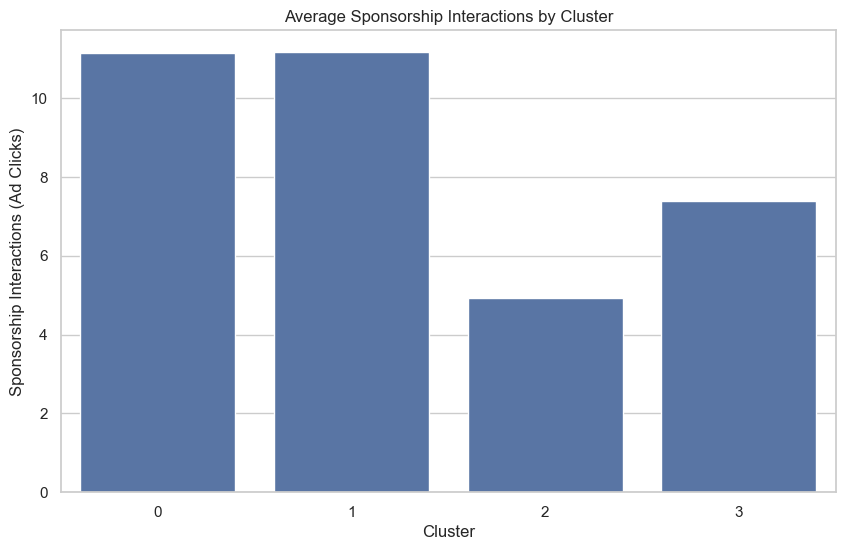

In [28]:
# 4. Sponsorship Interactions (Ad Clicks)
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y='Sponsorship Interactions (Ad Clicks)', data=cluster_means)
plt.title('Average Sponsorship Interactions by Cluster')
plt.ylabel('Sponsorship Interactions (Ad Clicks)')
plt.xlabel('Cluster')
plt.show()

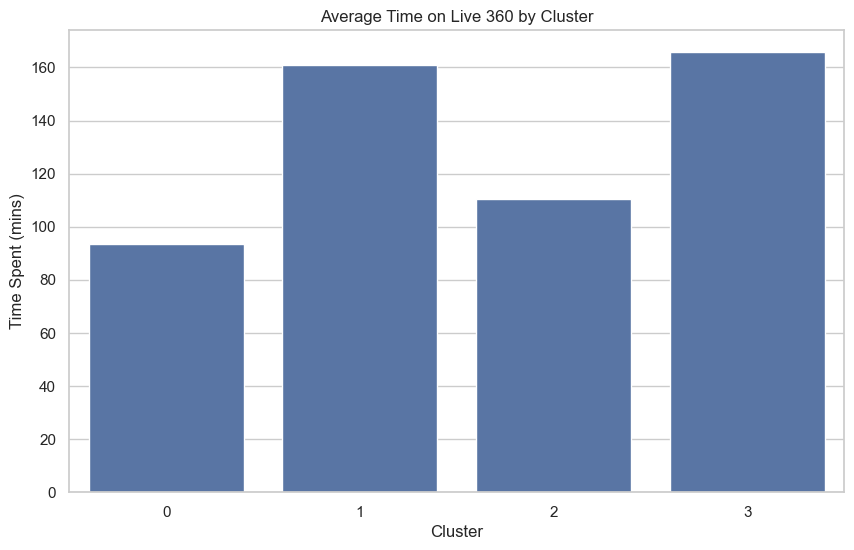

In [29]:
# 5. Time on Live 360 (mins)
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y='Time on Live 360 (mins)', data=cluster_means)
plt.title('Average Time on Live 360 by Cluster')
plt.ylabel('Time Spent (mins)')
plt.xlabel('Cluster')
plt.show()

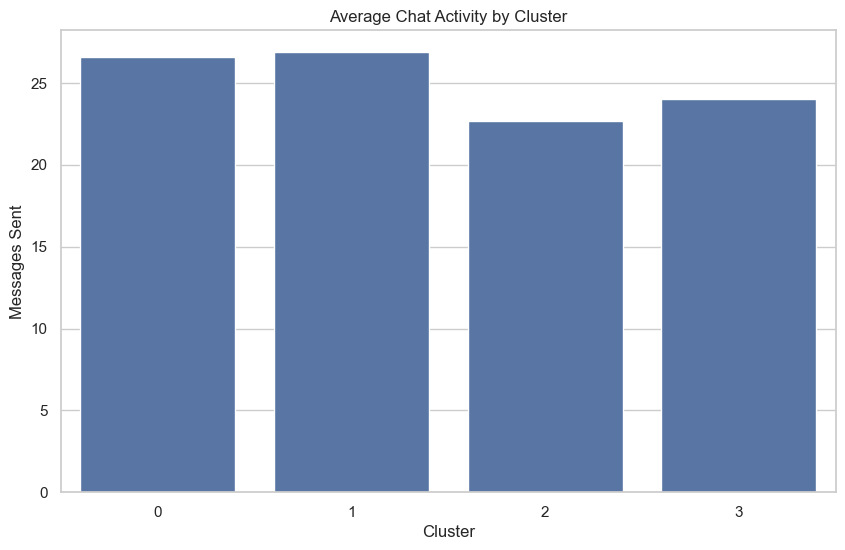

In [30]:
# 6. Real-Time Chat Activity (Messages Sent)
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y='Real-Time Chat Activity (Messages Sent)', data=cluster_means)
plt.title('Average Chat Activity by Cluster')
plt.ylabel('Messages Sent')
plt.xlabel('Cluster')
plt.show()

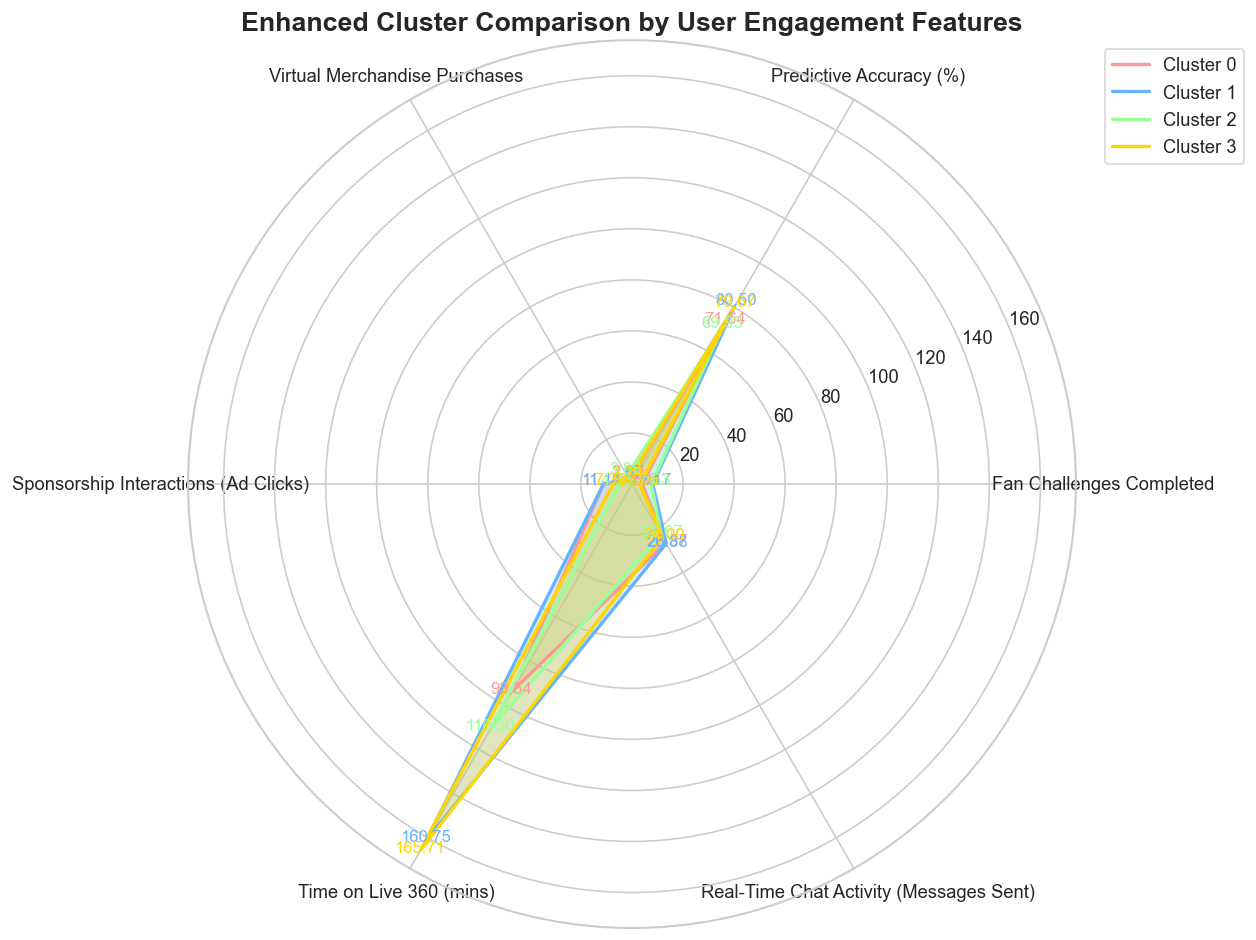

In [31]:
# Prepare data for the radar chart
labels = cluster_means.columns.tolist()
num_vars = len(labels)

# Create an array for each cluster
cluster_values = cluster_means.values

# Calculate angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Ensure the data is circular for radar chart
cluster_values = np.concatenate((cluster_values, cluster_values[:, [0]]), axis=1)
angles += angles[:1]

# Set up the radar chart
plt.figure(figsize=(12, 8), dpi=120)
ax = plt.subplot(111, polar=True)

# Define colors for each cluster (Red, Green, Blue, Yellow)
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFD700']
for i in range(len(cluster_values)):
    ax.fill(angles, cluster_values[i], color=colors[i], alpha=0.25)
    ax.plot(angles, cluster_values[i], color=colors[i], linewidth=2, label=f'Cluster {i}')
    
    # Annotate mean values on the radar chart
    for j in range(num_vars):
        ax.text(angles[j], cluster_values[i][j] + 1, f'{cluster_values[i][j]:.2f}', 
                horizontalalignment='center', size=10, color=colors[i])

# Configure the radar chart
plt.xticks(angles[:-1], labels, rotation=45)
ax.yaxis.grid(True)
plt.title('Enhanced Cluster Comparison by User Engagement Features', fontsize=16, weight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
# Save the cleaned and processed data for future use
df.to_csv('cleaned_velocityx_data.csv', index=False)

# Conclusions

## Fan Challenges Completed:

Cluster 1 completes the most fan challenges, followed closely by Cluster 2.
Cluster 0 and Cluster 3 complete the fewest challenges, with Cluster 3 showing the lowest engagement in this activity.

## Virtual Merchandise Purchases:

Cluster 2 stands out with the highest number of merchandise purchases, followed by Cluster 1.
Cluster 0 and Cluster 3 are less engaged in purchasing virtual merchandise.

## Sponsorship Interactions:

Cluster 0 and Cluster 1 show the highest interaction with sponsor ads, whereas Cluster 3 and Cluster 2 exhibit moderate to lower levels of ad clicks.

## Trends and Insights:

### Users Most Likely to Purchase Virtual Merchandise:

Cluster 2 users are the most likely to purchase virtual merchandise, with an average of 3.9 purchases per user. These users are highly engaged in fan challenges and are moderately active in real-time chat, though they exhibit lower accuracy in predictions. The combination of high merchandise purchases and engagement in fan challenges suggests that these users are motivated by in-app purchases and rewards for activity.

Cluster 1 users are also more likely to purchase merchandise (2.7 average purchases per user), though slightly less than Cluster 2. However, they are the most accurate in predictions and spend significant time on Live 360. These users might be driven by strategic participation and long-term engagement.

Cluster 0 and Cluster 3 exhibit lower merchandise purchases (1.8 and 2.2, respectively), indicating that they are less inclined towards making virtual purchases. Cluster 3 users, in particular, focus more on live content and accurate predictions, making them less likely to make purchases but highly engaged in other ways.

### Correlation Between User Activities and Merchandise Purchases:

Fan Challenges: There is a positive correlation between fan challenge participation and merchandise purchases. Clusters that complete more challenges (such as Cluster 1 and Cluster 2) also tend to make more purchases. Cluster 0, which completes fewer challenges, also shows lower purchase behavior.

Time on Live 360: While the correlation between time spent on Live 360 and merchandise purchases is moderate, Cluster 1 and Cluster 3 spend the most time on live coverage but make fewer purchases. This suggests that, while live content is a strong engagement factor, it may not directly drive merchandise sales for all clusters.

Real-Time Chat Activity: The relationship between chat activity and merchandise purchases is slightly negative, as observed in Cluster 2 users who participate more in chat but are less inclined towards merchandise purchases. Cluster 1 and Cluster 3, despite having high chat activity, are not as merchandise-focused as Cluster 2.

### Sponsorship Interactions and Merchandise Purchases:

Cluster 0 and Cluster 1 show a strong engagement with sponsorship interactions, but their merchandise purchases remain moderate. This suggests that users highly focused on sponsorships may not always overlap with merchandise buyers.

Cluster 2, which has the highest number of virtual merchandise purchases, has a lower level of ad clicks. This indicates that users who are focused on purchasing virtual goods may prioritize direct in-app engagement activities over interacting with sponsorships.

## Conclusions:

Cluster 2 users are the most likely to purchase virtual merchandise, driven by high engagement in challenges and moderate real-time chat activity.

Cluster 1 users, while highly accurate in predictions and deeply engaged with Live 360 content, are also inclined towards making purchases but to a lesser extent than Cluster 2.

Cluster 0 users are more focused on ad interactions and spend less on merchandise, while Cluster 3 users, despite being the most active in live coverage and having high predictive accuracy, are the least inclined to buy virtual merchandise.

## Recommendation:

Cluster 2 represents the best target for promoting virtual merchandise through in-app activities like fan challenges and personalized offers.

Cluster 1 users, with their long engagement times and high accuracy, can be targeted with high-value exclusive content or premium virtual goods.

For Cluster 0 and Cluster 3, a different strategy might be required—perhaps enhancing their challenge participation and creating more incentives for purchasing through strategic ads or exclusive live experiences.

# Proposed Fan Challenge: "Ultimate Strategist Challenge"

Concept:
The "Ultimate Strategist Challenge" is designed to engage users in a multi-level prediction-based challenge, combining both predictive accuracy and real-time participation. This challenge would involve users making predictions on upcoming events (e.g., match results, player performances) and earn points based on the accuracy of their predictions. Additionally, the challenge would offer bonus points for real-time engagement during live events through interactions like fan voting, quick trivia, and participating in virtual events within the "Live 360" feature.

Challenge Structure:
Prediction Rounds: Users submit predictions before each major event (e.g., matches, player stats, game outcomes) with points awarded for accuracy.
Live Bonus Activities: During live matches, users can earn bonus points for participating in real-time chats, answering trivia, or engaging with interactive sponsorship content.
Virtual Merchandise Rewards: High-scoring users are given exclusive virtual merchandise or in-app currency as rewards. Additionally, users who make real purchases (virtual merchandise) during the challenge can earn extra points, giving them a strategic advantage.
Leaderboard & Tiers: The challenge will have a leaderboard where users can track their progress. The top tier players at the end of the event win exclusive merchandise, discounts, or early access to premium content.

## Predicted Outcomes:

Increased Engagement:
Cluster 1 and Cluster 3 will find this challenge particularly engaging due to their high levels of predictive accuracy and strong involvement in "Live 360."
The live bonus activities will be a significant draw for Cluster 3, which already spends the most time on Live 360 and has high chat activity.
Cluster 1 users, who excel in both predictive accuracy and real-time engagement, are likely to fully engage with the prediction and trivia aspects, boosting their overall participation.

Higher Merchandise Purchases:
By offering bonus points for purchasing virtual merchandise, this challenge will incentivize Cluster 2, which is already the top spender on virtual goods, to make additional purchases in exchange for a competitive edge in the leaderboard.
Cluster 1 users, who already spend significant time on Live 360 and have a decent engagement with virtual merchandise, may also increase their purchases to stay competitive, especially with exclusive rewards at stake.
Cluster 0 and Cluster 3, who are less inclined to purchase virtual goods, may be incentivized through bonus points tied to purchases, particularly if their competitive nature and leaderboard rankings are emphasized.

Monetization & Sponsorship Interaction:
The challenge can incorporate sponsorship interactions (e.g., clicking ads for bonus points) to target Cluster 0 and Cluster 1 users, who show strong interaction with sponsor content. By linking ad interactions to leaderboard advancement, these users may further engage with sponsor content.
Additionally, users in Cluster 0, who have lower overall engagement in challenges and purchases but higher sponsorship interaction, could be drawn into the challenge as it taps into their interest in live ads and real-time bonus opportunities.

## Predicted Results by Cluster:

Cluster 0: Moderate engagement in predictions, but they are more likely to participate in sponsorship-based interactions. Incentives tied to ad clicks and bonus points may increase their engagement with the challenge, though their overall purchases may not see a major increase.

Cluster 1: Highly engaged in all aspects of the challenge (predictions, real-time engagement, and virtual merchandise purchases). Expected to show the highest overall participation and increase in virtual purchases due to their competitive nature and existing strong engagement.

Cluster 2: Likely to continue being top spenders on virtual merchandise. Their engagement in predictions may increase, but real-time activities could remain secondary. They will benefit from the merchandise purchase incentive tied to points.

Cluster 3: Will engage heavily in real-time activities (trivia, live chat), boosting time spent on Live 360. The competitive nature of the challenge may encourage more fan challenge participation and drive an increase in virtual merchandise purchases, though at a smaller scale compared to Cluster 1.

## Conclusion:

The "Ultimate Strategist Challenge" is predicted to drive increased user engagement, particularly from Cluster 1 and Cluster 3, by leveraging their high predictive accuracy and time spent on live content. With the integration of merchandise rewards and bonus points for purchases, Cluster 2 is expected to increase virtual merchandise spending. The challenge will also enhance interactions with sponsorships, particularly targeting Cluster 0 and Cluster 1, leading to better monetization across all user segments.